In [71]:
# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('test-1.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [72]:
# Ok, what does the data look like?

# Display for pretty tables
from IPython.display import display

print('Sample rows from the dataset (top and bottom five):')  # Spot checks
display(dataset.head(5))
display(dataset.tail(5))
print('\n')

Sample rows from the dataset (top and bottom five):


,HW-01,HW-02,HW-03,HW-04,HW-05,HW-06,Quiz-01,Quiz-02,HW-exam,Exam-01,Grade
0,0,96,0,0,0,0,0,0,0,0,F
1,100,60,5,98,98,0,1,1,95,4,F
2,63,100,38,73,0,0,0,0,0,10,F
3,98,98,100,96,96,100,5,4,100,18,P
4,100,0,0,98,48,60,0,1,0,7,F


,HW-01,HW-02,HW-03,HW-04,HW-05,HW-06,Quiz-01,Quiz-02,HW-exam,Exam-01,Grade
38,0,100,95,94,100,100,2,1,98,4,F
39,96,97,92,87,87,91,2,1,98,14,F
40,100,100,100,88,50,40,1,0,100,6,F
41,98,100,95,88,70,80,1,1,97,1,F
42,0,0,0,0,0,0,0,0,0,0,F


In [73]:
# Let's look at a numerical summary table

print('Summary of the dataset - Univariate statistics')   
display(dataset.describe(include='all'))
print('\n')

Summary of the dataset - Univariate statistics


,HW-01,HW-02,HW-03,HW-04,HW-05,HW-06,Quiz-01,Quiz-02,HW-exam,Exam-01,Grade
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
mean,73.186047,76.441860,62.255814,73.302326,54.488372,47.209302,1.255814,1.465116,68.883721,5.953488,NaN
std,41.287757,38.687578,42.429826,38.657553,44.640560,44.929340,1.216807,2.185982,45.922403,6.410384,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,73.500000,78.500000,2.500000,80.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
50%,96.000000,97.000000,80.000000,89.000000,76.000000,44.000000,1.000000,1.000000,98.000000,4.000000,NaN
75%,100.000000,100.000000,100.000000,98.000000,96.500000,94.000000,2.000000,2.000000,100.000000,7.500000,NaN


Summary of X - Univariate graphs

Histograms:


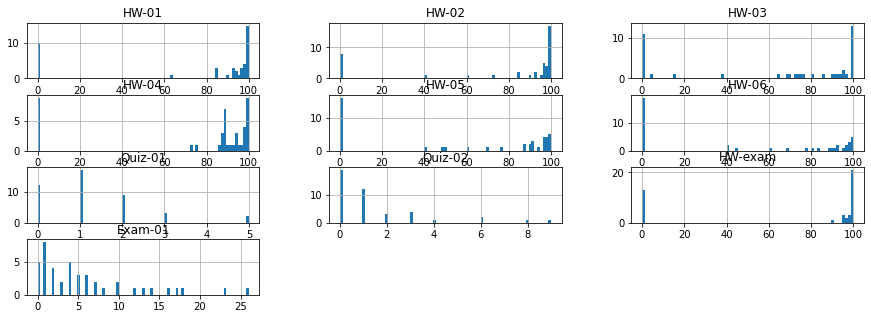

Box plots:


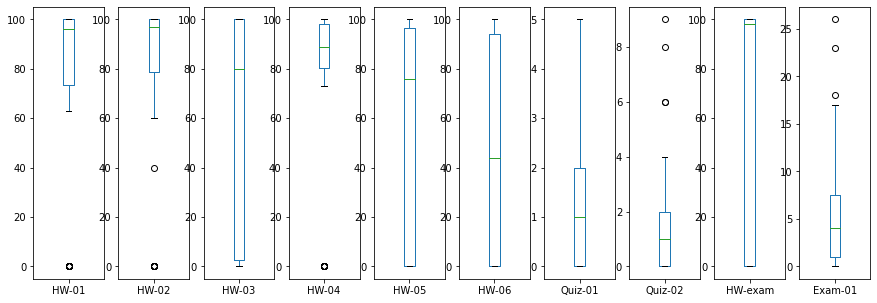

In [74]:
# Let's look at some graphical summaries

%matplotlib inline
import matplotlib.pyplot as pl  # https://matplotlib.org/

print('Summary of X - Univariate graphs')
print()

print('Histograms:')
dataset.hist(figsize=(15, 5), bins=75)  # bins ~= sqrt(N)
pl.show()

print('Box plots:')
dataset.plot(figsize=(15, 5), kind='box', subplots=True, sharex=False, sharey=False)
pl.show()

In [75]:
print('Reading list of problem variables X and Y...')
X_name = [ 'HW-01', 'HW-02', 'HW-03', 'HW-04', 'HW-05', 'HW-06', 'Quiz-01', 'Quiz-01', 'HW-exam' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features
y_name = 'Grade'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



In [76]:
# Spot checks for X:

print('Sample rows from X (top and bottom):')
display(X.head(3))
display(X.tail(3))
print('\n')

print('Statistical summary of X:')
display(X.describe())
print('\n')

Sample rows from X (top and bottom):


,HW-01,HW-02,HW-03,HW-04,HW-05,HW-06,Quiz-01,Quiz-01,HW-exam
0,0,96,0,0,0,0,0,0,0
1,100,60,5,98,98,0,1,1,95
2,63,100,38,73,0,0,0,0,0


,HW-01,HW-02,HW-03,HW-04,HW-05,HW-06,Quiz-01,Quiz-01,HW-exam
40,100,100,100,88,50,40,1,1,100
41,98,100,95,88,70,80,1,1,97
42,0,0,0,0,0,0,0,0,0




Statistical summary of X:


,HW-01,HW-02,HW-03,HW-04,HW-05,HW-06,Quiz-01,Quiz-01,HW-exam
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,73.186047,76.441860,62.255814,73.302326,54.488372,47.209302,1.255814,1.255814,68.883721
std,41.287757,38.687578,42.429826,38.657553,44.640560,44.929340,1.216807,1.216807,45.922403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.500000,78.500000,2.500000,80.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96.000000,97.000000,80.000000,89.000000,76.000000,44.000000,1.000000,1.000000,98.000000
75%,100.000000,100.000000,100.000000,98.000000,96.500000,94.000000,2.000000,2.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,5.000000,5.000000,100.000000


In [77]:
# Spot checks for y:

print('Summary of y:')
display(y.value_counts())

Summary of y:


F    38
P     5
Name: Grade, dtype: int64

In [78]:
# Now it's time to train the K Nearest Neighbors model

print('Working on model fitting...')

import sklearn  # Sci-Kit Learn for ML
from sklearn.neighbors import KNeighborsClassifier   # we will use the kNN classifier

neigh = KNeighborsClassifier(n_neighbors=3)  # only consider the THREE nearest neighbors
neigh.fit(X,y)  #  this is all it takes! Training Model

print('Done!')

Working on model fitting...
Done!


In [79]:
# Time for ML

# Split data into training and testing datasets
from sklearn import model_selection

test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # setting the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
print('done with setting aside data for testing')

done with setting aside data for testing


In [80]:
# Now train the Regression model on the data 

# algorithms
from sklearn.linear_model import LogisticRegression

print('training model...')
modelName = LogisticRegression(solver='liblinear')
modelName.fit(X_train, y_train)  # train the model on the training data
print('done with training the model')

training model...
done with training the model


In [81]:
# How does the KNN model do with predictions? 

# Let's compute its accuracy on the data we set aside.
from sklearn.metrics import accuracy_score

print('computing accuracy...')
y_predicted = neigh.predict(X_test)  # make predictions using the validation data 
print('Accuracy:', accuracy_score(y_test, y_predicted))

computing accuracy...
Accuracy: 1.0


In [112]:
# Time to make predictions and test performance
import numpy as np

# X_test = [1.5, 1.5]  # We're hoping this predicts a "0", since this is a "lower left" point.
X_test = X_train  # We're hoping this predicts a "1", since this is a "top and to the right" point.

print('Input for testing is: ')
# print(X_test)

predicted_y = neigh.predict(X_test)  # using trained model for prediction

print('Predicted label is: ')
# print(predicted_y)   #  done!
T = np.column_stack((X_test, y_train, predicted_y))
df = pandas.DataFrame(T, columns = ['HW-01', 'HW-02', 'HW-03', 'HW-04', 'HW-05', 'HW-06', 'Quiz-01', 'Quiz-01', 'HW-exam', 'Grade', 'Pred_Grade'])
# print(df)
print(df.iloc[:,[-1,-2]])

Input for testing is: 
Predicted label is: 
   Pred_Grade Grade
0           F     F
1           F     F
2           F     F
3           F     F
4           F     F
5           F     F
6           F     F
7           F     F
8           F     F
9           F     F
10          F     F
11          F     P
12          P     F
13          F     F
14          F     F
15          F     F
16          P     P
17          F     F
18          F     F
19          F     F
20          F     F
21          F     F
22          F     P
23          P     P
24          F     F
25          F     F
26          F     F
27          F     F
28          F     F
29          F     F
30          F     F
31          F     P
32          F     F
33          F     F


In [84]:
# How does the Regression model do with predictions? 

# Let's compute its accuracy on the data we set aside.
from sklearn.metrics import accuracy_score

print('computing accuracy...')
y_predicted = modelName.predict(X_test)  # make predictions using the validation data 
print('Accuracy:', accuracy_score(y_test, y_predicted))

computing accuracy...


ValueError: Found input variables with inconsistent numbers of samples: [9, 34]

In [87]:
# Evaluate Some Classification Algorithms

# Now it is time to train some models on the data and estimate their accuracy on unseen data.

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Algorithms
models = []
models.append(('Logistic-Regression', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('KNN-uniform', KNeighborsClassifier(n_neighbors=3, weights='uniform'))) # default is n_neighbors=5, weights='uniform'

# evaluate each model in turn
results = []
names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))

    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('\n')  

RESULTS FOR Logistic-Regression


C:\Users\nhoss\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Found input variables with inconsistent numbers of samples: [9, 34]

In [88]:
# assessment
from sklearn import model_selection # for model comparisons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Algorithms
models = []
models.append(('KNN-uniform-weight-3', KNeighborsClassifier(n_neighbors=3, weights='uniform'))) # default is n_neighbors=5, weights='uniform'
models.append(('KNN-uniform-weight-7', KNeighborsClassifier(n_neighbors=7, weights='uniform'))) # default is n_neighbors=5, weights='uniform'
models.append(('KNN-distance-weight-3', KNeighborsClassifier(n_neighbors=3, weights='distance'))) # default is n_neighbors=5, weights='uniform'

# evaluate each model in turn
results = []
names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))

    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('\n')  

RESULTS FOR KNN-uniform-weight-3


ValueError: Found input variables with inconsistent numbers of samples: [9, 34]

In [19]:
# Chose the formative scoring method

print('Reading list of scoring methods to use during model development ...')
scoring = 'accuracy'
print('done \n')

Reading list of scoring methods to use during model development ...
done 



In [20]:
# Now it is time to train some models on the data and estimate their accuracy on unseen data.

k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    
print('done \n')

 ++ NOW WORKING ON ALGORITHM KNN-uniform-weight-3 ++
Splitting data into 5 folds
Training model on each split
algorithm KNN-uniform-weight-3 accuracy results: mean = 0.880952 (std = 0.060234)
 ++ NOW WORKING ON ALGORITHM KNN-uniform-weight-7 ++
Splitting data into 5 folds
Training model on each split
algorithm KNN-uniform-weight-7 accuracy results: mean = 0.847619 (std = 0.139321)
 ++ NOW WORKING ON ALGORITHM KNN-distance-weight-3 ++
Splitting data into 5 folds
Training model on each split
algorithm KNN-distance-weight-3 accuracy results: mean = 0.909524 (std = 0.074383)
done 



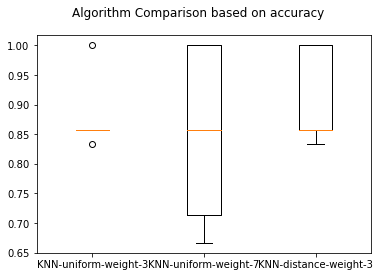

In [21]:
# Compare Algorithms
fig = pl.figure()
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()

In [22]:
# We can do a similar process to chose between different hyperparameters for a model
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[3, 7], 'weights':['uniform','distance']}
clf = GridSearchCV(modelName, parameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print('\n')

print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full test set.")
print('\n')
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print('done \n')

Best parameters set found on development set:
{'n_neighbors': 3, 'weights': 'distance'}
Grid scores on development set:
0.857 (+/-0.181) for {'n_neighbors': 3, 'weights': 'uniform'}
0.914 (+/-0.140) for {'n_neighbors': 3, 'weights': 'distance'}
0.852 (+/-0.019) for {'n_neighbors': 7, 'weights': 'uniform'}
0.914 (+/-0.140) for {'n_neighbors': 7, 'weights': 'distance'}


Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full test set.


              precision    recall  f1-score   support

           F       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

done 

